In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [766]:
num_steps = 10000
num_band = 10         # NUMBER OF BANDITS
epsilon1 = 0.1         # EPSILON 1 IN EPSILON-GREEDY
epsilon2 = 0.01         # EPSILON 2 IN EPSILON-GREEDY
alpha = 0.05          # ALPHA IN EXPONENTIAL RECENCY WEIGHTED AVERAGE
temp_Q = np.zeros(num_band)
temp_N = np.zeros(num_band)
index_vec = np.arange(0,num_band)
temp_R = np.random.uniform(0,3,10)  # REWARD DISTRIBUTION
tot_Reward = np.zeros(num_ep)        # FINAL VALUE TO BE PLOTTED

temp_Q2 = np.zeros(num_band)
temp_N2 = np.zeros(num_band)
index_vec2 = np.arange(0,num_band)
tot_Reward2 = np.zeros(num_ep)      # FINAL VALUE TO BE PLOTTED

print(temp_R)
i = 1

[1.02838742 1.44495851 0.12409928 1.89595058 1.06450604 0.66769485
 1.14461906 2.72066582 2.03233211 0.26501192]


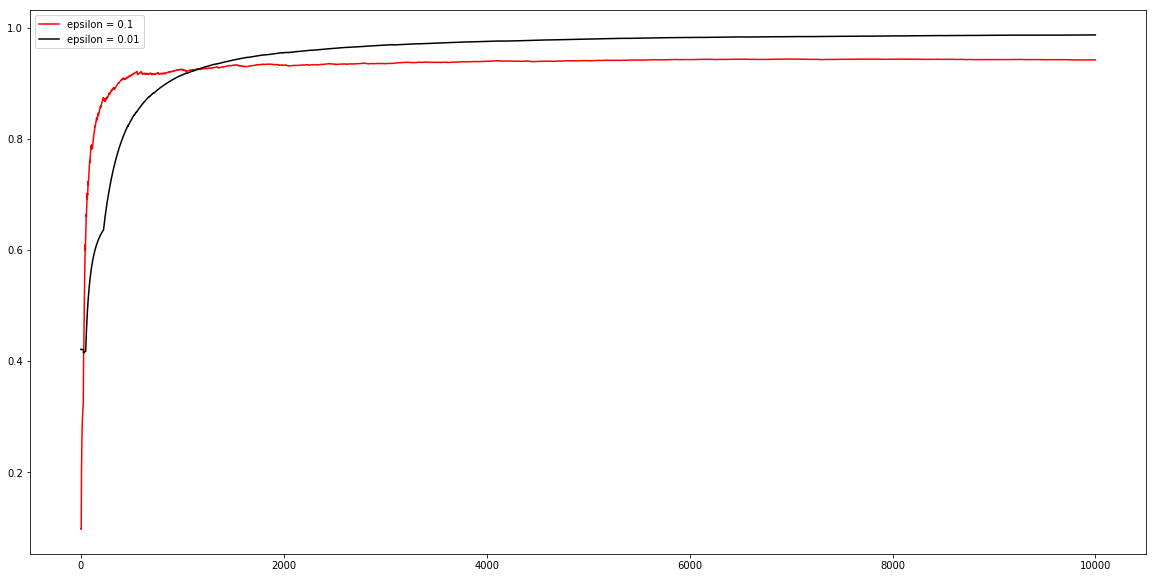

In [767]:
for step in range(num_steps):
  
  #  FIRST GRAPH
  
  if np.random.uniform(0,1)>epsilon1:
      if len(np.argwhere(temp_Q==np.amax(temp_Q)).flatten())>1:
          index = np.random.choice(index_vec[np.argwhere(temp_Q==np.amax(temp_Q)).flatten()])
      else:
          index = index_vec[np.argwhere(temp_Q==np.amax(temp_Q)).flatten()]
  else:
      index = np.random.choice(index_vec)
  reward = temp_R[index]
  tot_Reward[step] = tot_Reward[step-1] + reward
  temp_N[index] = temp_N[index] + 1
  temp_Q[index] = temp_Q[index] + (reward - temp_Q[index])/temp_N[index]
  
  # SECOND GRAPH
  
  if np.random.uniform(0,1)>epsilon2:
      if len(np.argwhere(temp_Q2==np.amax(temp_Q2)).flatten())>1:
          index = np.random.choice(index_vec2[np.argwhere(temp_Q2==np.amax(temp_Q2)).flatten()])
      else:
          index = index_vec2[np.argwhere(temp_Q2==np.amax(temp_Q2)).flatten()]
  else:
      index = np.random.choice(index_vec2)
  reward = temp_R[index]
  tot_Reward2[step] = tot_Reward2[step-1] + reward
  temp_N2[index] = temp_N2[index] + 1
  temp_Q2[index] = temp_Q2[index] + (reward - temp_Q2[index])/temp_N2[index]
  
  
  
#   PLOTTING THE RATIO OF TOTAL REWARD OBTAINED TO MAXIMUM OBTAINABLE REWARD

plt.plot(np.divide(tot_Reward,np.amax(temp_R)*np.arange(1,num_ep+1,1)),'r',label = 'epsilon = 0.1 ')
plt.plot(np.divide(tot_Reward2,np.amax(temp_R)*np.arange(1,num_ep+1,1)),'k', label = 'epsilon = 0.01')
plt.legend(loc='best')
plt.show()

In [768]:
print(np.amax(tot_Reward))
print(np.divide(tot_Reward,np.amax(temp_R)*np.arange(0,num_ep,1))[-1])
print(np.divide(tot_Reward2,np.amax(temp_R)*np.arange(0,num_ep,1))[-1])

25618.46677709815
0.9417190703864734
0.9867835016653651


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
